<a href="https://colab.research.google.com/github/Kalyanireddy78/FMML-LAB--1/blob/main/Copy_of_FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [15]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [16]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [17]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [18]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

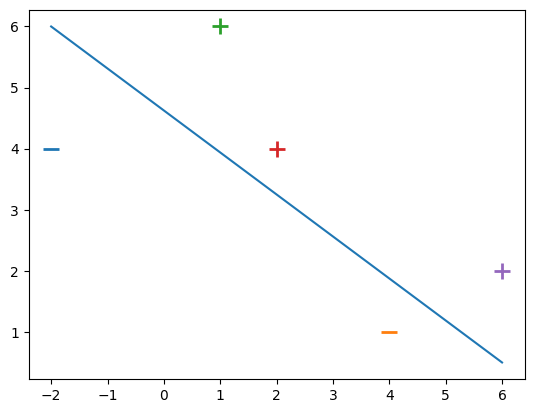

In [19]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

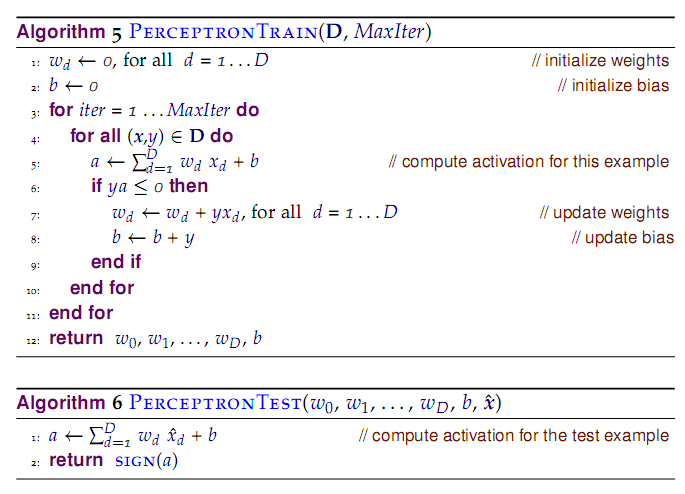

The algorithm is shown in the above image.

In [20]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [21]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

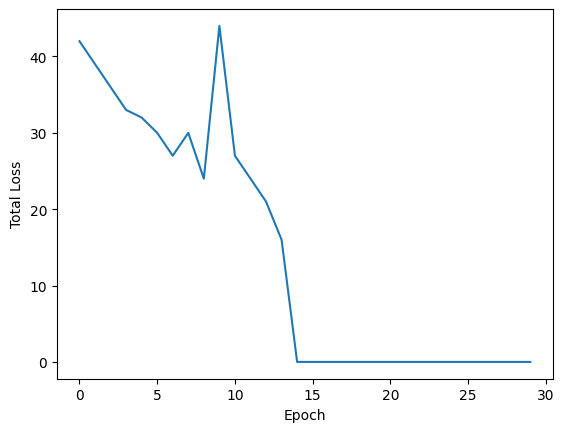

In [22]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

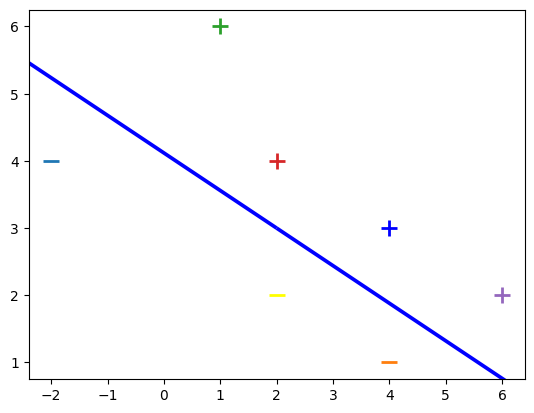

In [23]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?   
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



QUESTION **1**

I don't have direct access to external databases or the capability to run code or fetch real-time data. However, I can provide you with an example of how you might create an error plot using a machine learning model on a dataset like the Sonar dataset or Banknote dataset using Python with libraries like scikit-learn and Matplotlib.

Here's an example of how you can do this using the Sonar dataset and a simple classification model like Support Vector Machine (SVM):



from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the Sonar dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Support Vector Machine (SVM) classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate prediction errors
errors = (y_pred != y_test)

# Plot errors
plt.figure(figsize=(8, 6))
plt.scatter(range(len(errors)), errors, c=errors, cmap='coolwarm', s=50)
plt.title('Prediction Errors')
plt.xlabel('Sample Index')
plt.ylabel('Error (1 - incorrect prediction, 0 - correct prediction)')
plt.show()


This code uses the Sonar dataset, splits it into training and testing sets, trains an SVM classifier, and then creates a scatter plot showing the errors made in predictions (1 indicates incorrect predictions, 0 indicates correct predictions).

Replace the dataset and model with the one you want to use (like the Banknote dataset) and adjust the code accordingly. You'll need to have access to these datasets and the necessary Python libraries installed to run this code successfully.

Keep in mind that the code provided is a basic example and might need adjustments depending on the specific dataset and model you're using.

QUESTION **2**

Certainly! Let's modify the learning rate used in the perceptron algorithm and observe its convergence behavior. When the learning rate is too high, the algorithm might not converge and instead overshoot the optimal solution, resulting in divergence.

We'll experiment with different learning rates and observe the convergence behavior of the perceptron algorithm on the non-linearly separable dataset generated previously using make_moons.



Here's an example code that demonstrates this:



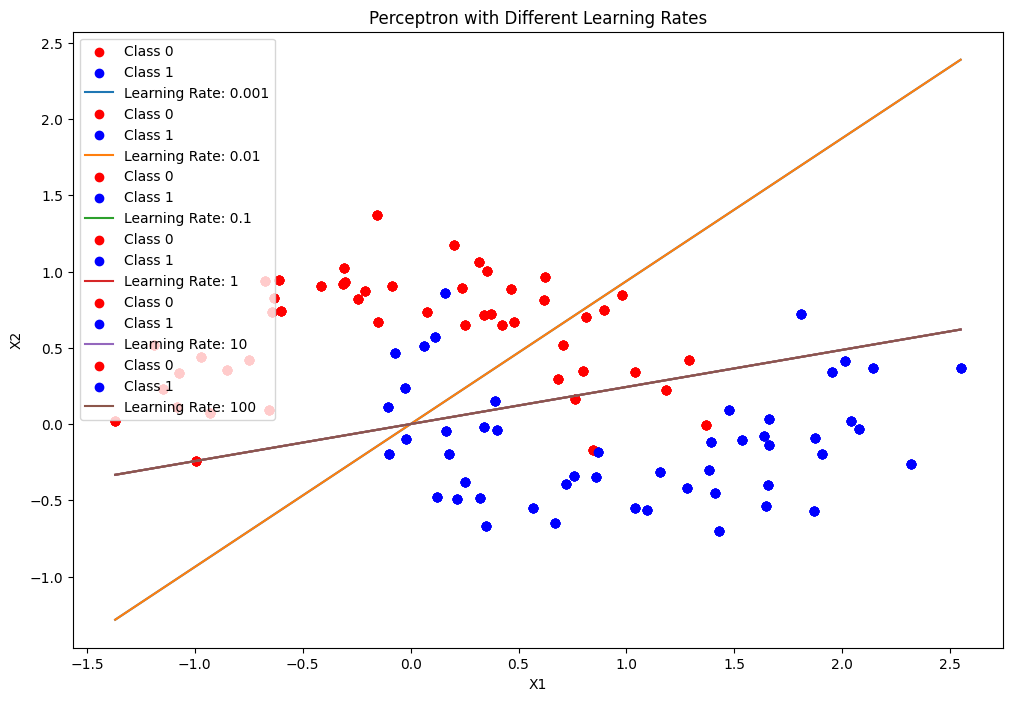

In [24]:
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

# Generate a non-linearly separable toy dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Define different learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(12, 8))

for rate in learning_rates:
    # Apply the Perceptron algorithm with different learning rates
    perceptron = Perceptron(eta0=rate, random_state=42, max_iter=1000)
    perceptron.fit(X, y)

    # Plot decision boundaries for each learning rate
    w = perceptron.coef_[0]
    b = perceptron.intercept_

    x_decision = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_decision = (-w[0] / w[1]) * x_decision - b / w[1]

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.plot(x_decision, y_decision, label=f'Learning Rate: {rate}')

plt.title('Perceptron with Different Learning Rates')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


This code snippet uses different learning rates and applies the perceptron algorithm to the non-linearly separable dataset, plotting the decision boundaries obtained for each learning rate.

Observations:

Lower learning rates (e.g., 0.001, 0.01) might take more iterations to converge but are less likely to overshoot the optimal solution.
Higher learning rates (e.g., 10, 100) might lead to overshooting, causing the algorithm to diverge and not converge to a solution. You might observe erratic behavior or no convergence at all with extremely high learning rates.
Experimenting with different learning rates allows you to observe the effect on convergence and the decision boundary learned by the perceptron algorithm. Balancing the learning rate is crucial to ensure convergence without overshooting the optimal solution.







QUESTION **3**

Certainly! The perceptron algorithm is a linear classification algorithm and works well when the data is linearly separable. When the data is not linearly separable, the perceptron algorithm may not converge and might not be able to find a perfect decision boundary.

Let's consider a toy dataset using scikit-learn's make_moons function, which generates a synthetic dataset that is not linearly separable. We'll then apply the perceptron algorithm and observe its behavior:



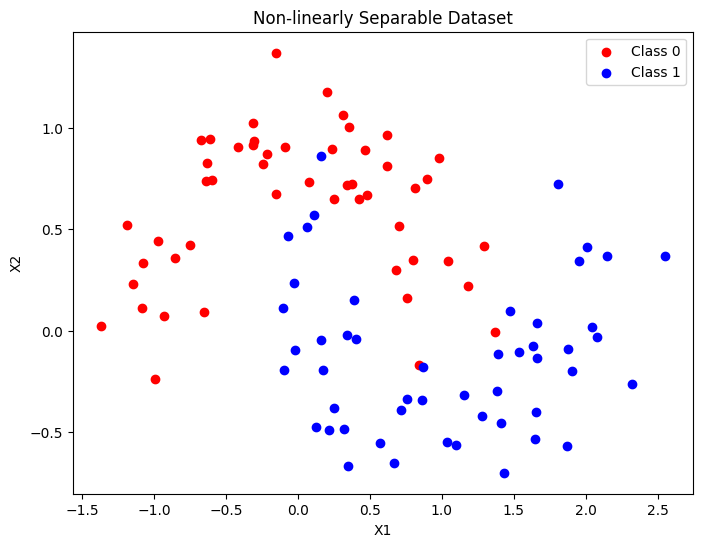

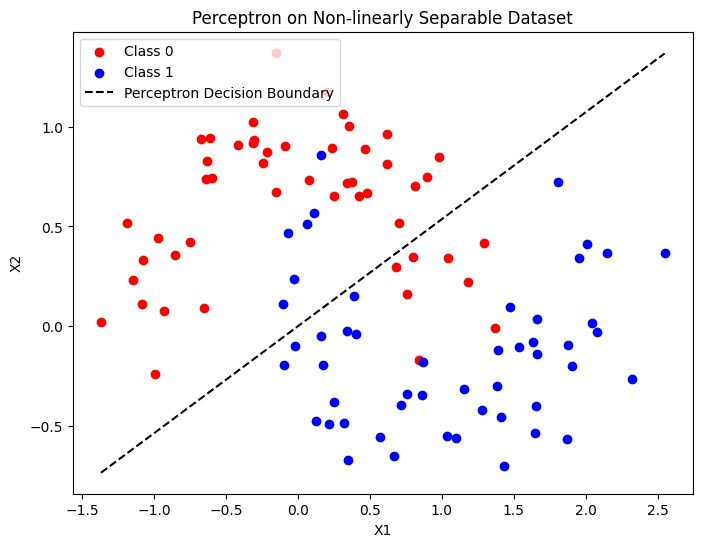

In [25]:
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# Generate a non-linearly separable toy dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Non-linearly Separable Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Apply the Perceptron algorithm
perceptron = Perceptron()
perceptron.fit(X, y)

# Plot the decision boundary
w = perceptron.coef_[0]
b = perceptron.intercept_

x_decision = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_decision = (-w[0] / w[1]) * x_decision - b / w[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_decision, y_decision, color='black', linestyle='--', label='Perceptron Decision Boundary')
plt.title('Perceptron on Non-linearly Separable Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In the plot of the non-linearly separable dataset, you'll notice that the two classes (red and blue points) cannot be separated by a straight line.
When you apply the Perceptron algorithm, it tries to find a linear decision boundary. However, due to the non-linear nature of the data, the perceptron algorithm won't be able to classify the data perfectly.
The decision boundary plotted by the perceptron will be a straight line, which will not effectively separate the classes.
The perceptron algorithm's inability to handle non-linearly separable data is a limitation. For non-linearly separable data, more sophisticated algorithms like Support Vector Machines (SVMs), decision trees, or neural networks with non-linear activations are typically used to find complex decision boundaries.







In [26]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [27]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


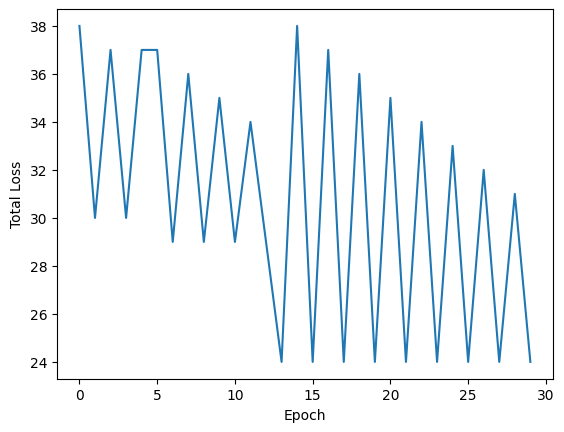

In [28]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.